# Section 1.A: Uploading the data in Jupyter notebook

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

#Data for the S&p500 is downloaded from Yahoo Finance: https://finance.yahoo.com/quote/%5EGSPC/history?ltr=1
df = pd.read_csv('^GSPC.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
2,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
3,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
4,1928-01-09,17.500000,17.500000,17.500000,17.500000,17.500000,0
...,...,...,...,...,...,...,...
23323,2020-11-06,3508.340088,3521.580078,3484.340088,3509.439941,3509.439941,4833950000
23324,2020-11-09,3583.040039,3645.989990,3547.479980,3550.500000,3550.500000,8556610000
23325,2020-11-10,3543.260010,3557.219971,3511.909912,3545.530029,3545.530029,6024230000
23326,2020-11-11,3563.219971,3581.159912,3557.000000,3572.659912,3572.659912,4609970000


# Section 1.B: Summary statistics  

In [4]:
#The dataset ranges from January 1928 to November 2020: 
(df.Date.min(),df.Date.max())

('1928-01-03', '2020-11-12')

/home/nico/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Open', ylabel='Density'>

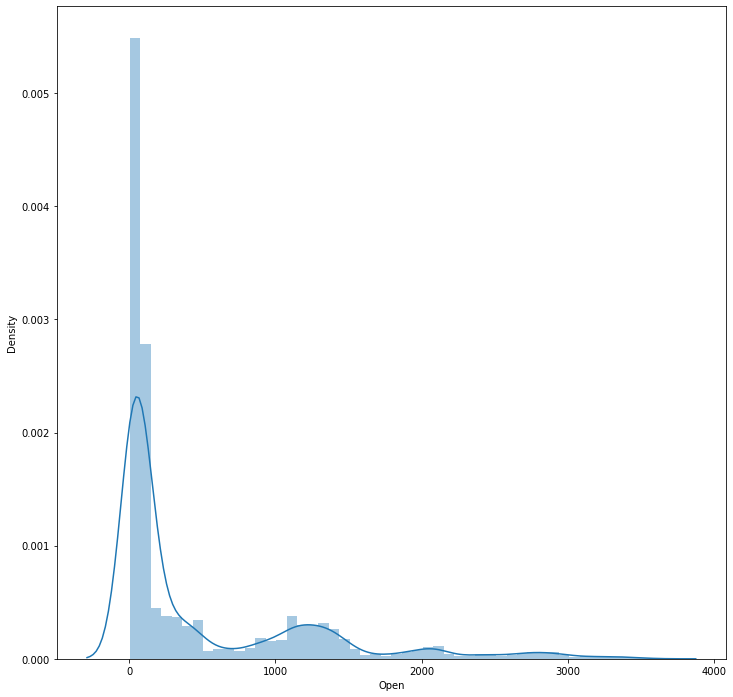

In [5]:
#Histogram of the S&P500 index (We use 'Open' as the stock market index):
plt.figure(figsize=(12,12))
sns.distplot(df['Open'])

/home/nico/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Date', ylabel='Open'>

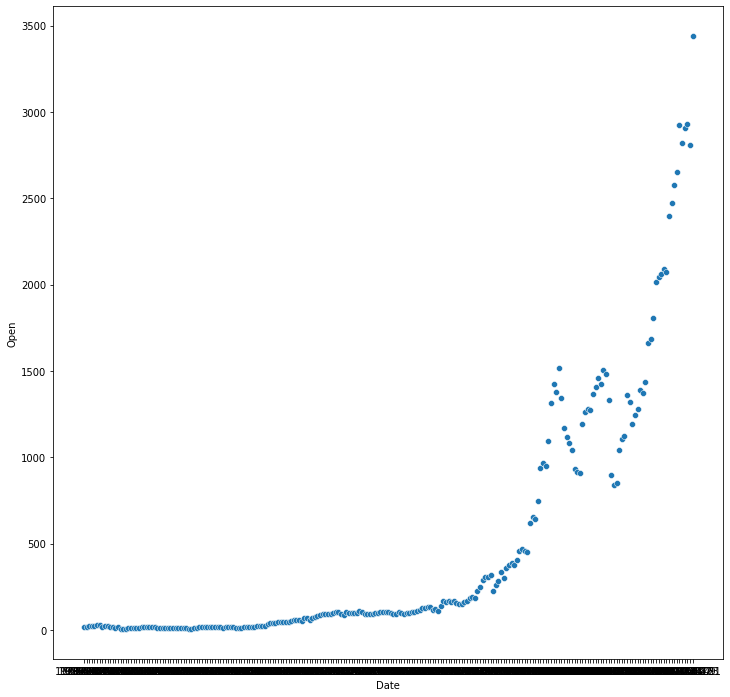

In [8]:
#We restrict the original dataset by sampling randomly with "pd.sample()", and we show the scatterplot of 'Open' through time: 
#WE select 1% of he sample randomly. 
restricted_dataset = df.sample(233) 
restricted_dataset = restricted_dataset.sort_values(by='Date')

plt.figure(figsize=(12,12))
sns.scatterplot(restricted_dataset['Date'], restricted_dataset['Open']) 

In [9]:
#We create a binary variable taking value 1 if the index increased with respect to the previous day, 0 otherwise:
df['lag_open'] =df.Open.shift(1)
df['delta_prev_day'] = df.Open - df['lag_open'] 
df['binary_change'] = df['delta_prev_day'].map(lambda x: 1 if x>=0 else 0)

del df['lag_open']
#del df['delta_prev_day']

In [10]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,delta_prev_day,binary_change
0,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0,NaN,0
1,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0,-0.040001,0
2,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0,-0.170000,0
3,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0,0.110001,1
4,1928-01-09,17.500000,17.500000,17.500000,17.500000,17.500000,0,-0.160000,0
...,...,...,...,...,...,...,...,...,...
23323,2020-11-06,3508.340088,3521.580078,3484.340088,3509.439941,3509.439941,4833950000,22.600098,1
23324,2020-11-09,3583.040039,3645.989990,3547.479980,3550.500000,3550.500000,8556610000,74.699951,1
23325,2020-11-10,3543.260010,3557.219971,3511.909912,3545.530029,3545.530029,6024230000,-39.780029,0
23326,2020-11-11,3563.219971,3581.159912,3557.000000,3572.659912,3572.659912,4609970000,19.959961,1


In [11]:
df.binary_change.value_counts()
#1    12580
#0    10748

#The index increased 12580 times and declined 10748 times throughout 1928-2020. 

1    12580
0    10748
Name: binary_change, dtype: int64

In [12]:
#Boolean mask: 
df.delta_prev_day[df.binary_change==0].mean()
#-3.6346420459663156

#The index declined by 3.63 points on average on "negative days" (i.e., days in which the index declined).

-3.6346420459663156

In [13]:
#Boolean mask: 
df.delta_prev_day[df.binary_change==1].mean()
#3.3868368831478537

#The index increased by 3.38 points on average on "positive days" (i.e., days in which the index declined).

3.3868368831478537

# Section 3: Train Test Split

We can then fit the stepwise_model object to a training data set. Because this is a time series forecast, we will “chop off” a portion of our latest data and use that as the test set. Then we will train on the rest of the data and forecast into the future. Afterwards we can compare our forecast with the section of data we chopped off.

We’ll train on 83 years of data (i.e., 1928-2010), and we test our forecast on the years after that and compare it to the real data:

In [39]:
#df.to_csv('/home/nico/Desktop/save1.csv')

#https://www.w3resource.com/pandas/dataframe/dataframe-set_index.php
df.set_index('Date', drop=False, inplace=True )
#del df['Unnamed: 0']


In [42]:
df.head(2)
df.to_csv('/home/nico/Desktop/save2.csv')

#df.to_csv('/home/nico/Desktop/trialllllllllll1.csv')

In [48]:
train = df.loc['1928-01-03':'2010-12-31']
test = df.loc['2011-01-03':]

In [72]:
type(test )

pandas.core.frame.DataFrame

# Section 4: Custom SARIMA model

In [4]:
# Try some custom ARIMA models: 

In [90]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib
import pmdarima as pm

In [114]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

mod = SARIMAX(train.Open,
            order=(1,2,1),
            seasonal_order=(1,2,1, 7),
            enforce_stationarity=False,
            enforce_invertibility=False)

results = mod.fit()
#https://stackoverflow.com/questions/59240565/why-doesnt-python-statsmodels-sarimax-predict-work
test.shape[0]
future_forecast = results.forecast(steps=2484)
future_forecast.index=pd.DatetimeIndex(test.index.values)



/home/nico/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/nico/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/nico/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


<AxesSubplot:xlabel='Date'>

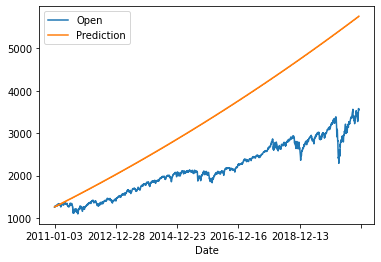

In [141]:
type(future_forecast)
future_forecast_df = pd.DataFrame(future_forecast,index = test.index, columns=['Prediction'])
pd.concat([test.Open,future_forecast_df],axis=1).plot()


<AxesSubplot:>

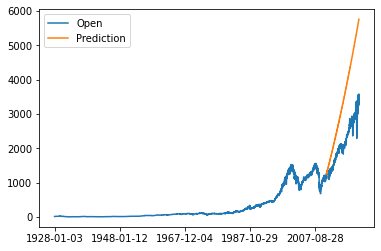

In [142]:
pd.concat([df.Open,future_forecast_df],axis=1).plot()

In [122]:
print(results.summary())


                                     SARIMAX Results                                     
Dep. Variable:                              Open   No. Observations:                20844
Model:             SARIMAX(1, 2, 1)x(1, 2, 1, 7)   Log Likelihood              -71332.970
Date:                           Sat, 14 Nov 2020   AIC                         142675.940
Time:                                   12:41:51   BIC                         142715.659
Sample:                                        0   HQIC                        142688.910
                                         - 20844                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0304      0.002    -13.630      0.000      -0.035      -0.026
ma.L1         -1.0000      0.045    -22.180

# SARIMA model (stronger MA effects)

In [151]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

mod = SARIMAX(train.Open,
            order=(1,2,3),
            seasonal_order=(1,2,1, 7), 
            enforce_stationarity=False,
            enforce_invertibility=False)

results = mod.fit()
#https://stackoverflow.com/questions/59240565/why-doesnt-python-statsmodels-sarimax-predict-work
test.shape[0]
future_forecast = results.forecast(steps=2484)
future_forecast.index=pd.DatetimeIndex(test.index.values)

/home/nico/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/nico/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/nico/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


<AxesSubplot:xlabel='Date'>

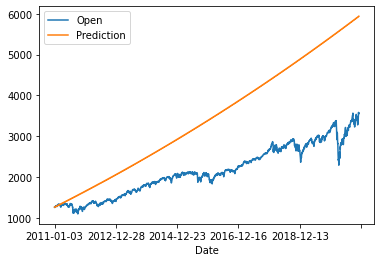

In [152]:
type(future_forecast)
future_forecast_df = pd.DataFrame(future_forecast,index = test.index, columns=['Prediction'])
pd.concat([test.Open,future_forecast_df],axis=1).plot()


<AxesSubplot:>

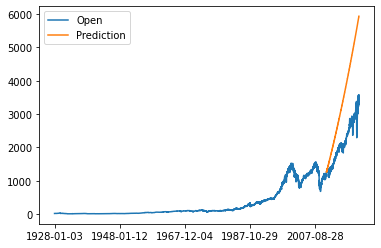

In [153]:
pd.concat([df.Open,future_forecast_df],axis=1).plot()

In [ ]:
# SARIMA model (stronger seasonal effects and weaker AR effects)

/home/nico/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/nico/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/nico/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


<AxesSubplot:xlabel='Date'>

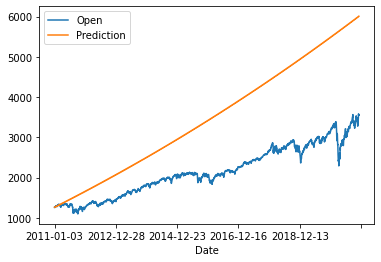

In [154]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

mod = SARIMAX(train.Open,
            order=(0,2,3),
            seasonal_order=(1,2,1, 7), 
            enforce_stationarity=False,
            enforce_invertibility=False)

results = mod.fit()
#https://stackoverflow.com/questions/59240565/why-doesnt-python-statsmodels-sarimax-predict-work
test.shape[0]
future_forecast = results.forecast(steps=2484)
future_forecast.index=pd.DatetimeIndex(test.index.values)

type(future_forecast)
future_forecast_df = pd.DataFrame(future_forecast,index = test.index, columns=['Prediction'])
pd.concat([test.Open,future_forecast_df],axis=1).plot()